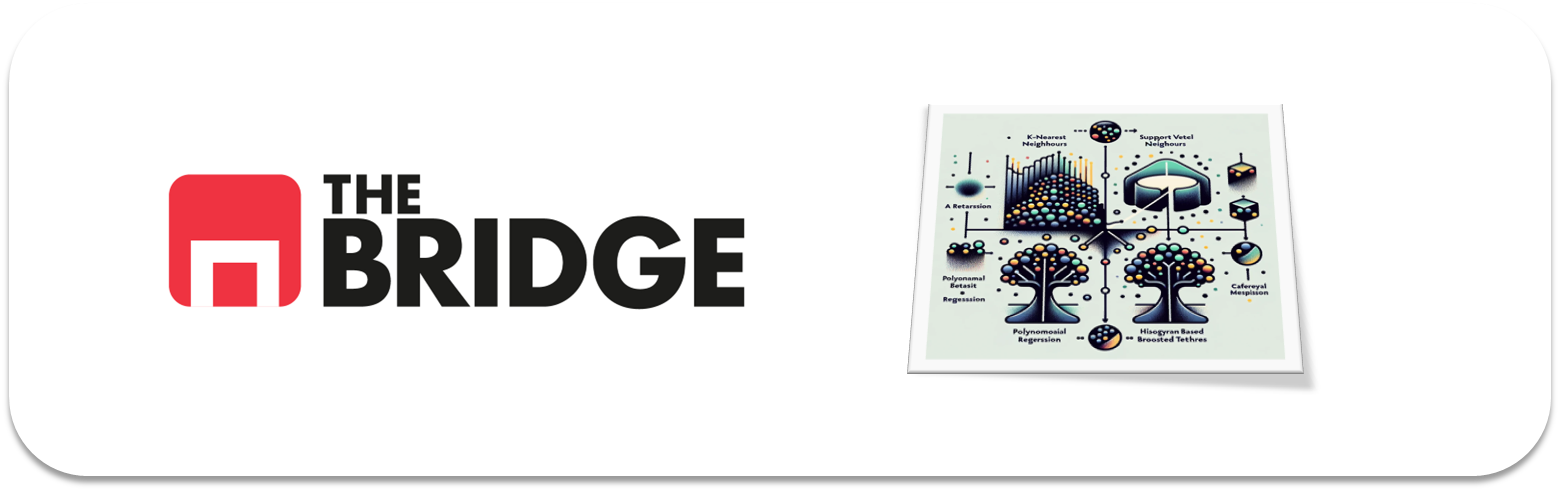

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import funciones_ML as bt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report, make_scorer, mean_absolute_error,mean_absolute_percentage_error,confusion_matrix,accuracy_score, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import resample
from sklearn import tree
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_credit=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_14\UNIT_1\PRACTICA_OBL\data\credit_npo.csv")

In [3]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


[TARGET]**SeriousDlqin2yrs:** Indica si el individuo ha tenido retrasos morosos graves en sus líneas de crédito revolvente en los últimos 2 años (1 = sí, 0 = no).

**RevolvingUtilizationOfUnsecuredLines:** Representa el porcentaje del límite de crédito disponible que se utiliza en las líneas de crédito de "revolving" sin garantía. Un valor alto indica un mayor uso del crédito y puede ser negativo para la calificación crediticia.

**ageNumberOfTime30-59DaysPastDueNotWorse:** Muestra el número de veces que el individuo ha tenido pagos atrasados de 30 a 59 días en los últimos 2 años, sin empeorar su situación crediticia.

**DebtRatio:** Representa la relación entre la deuda total del individuo y sus ingresos mensuales. Un valor alto indica una mayor carga de deuda y puede ser negativo para la calificación crediticia.

**MonthlyIncome:** Indica el ingreso mensual del individuo.

**NumberOfOpenCreditLinesAndLoans:** Muestra el número total de líneas de crédito y préstamos abiertos que tiene el individuo. Un número alto puede indicar una mayor dispersión del crédito y potencialmente un mayor riesgo.

**NumberOfTimes90DaysLate:** Indica el número de veces que el individuo ha tenido pagos atrasados de 90 días o más en los últimos 2 años.

**NumberRealEstateLoansOrLines:** Representa el número de préstamos o líneas de crédito inmobiliario que tiene el individuo.

**NumberOfTime60-89DaysPastDueNotWorse:** Muestra el número de veces que el individuo ha tenido pagos atrasados de 60 a 89 días en los últimos 2 años, sin empeorar su situación crediticia.

**NumberOfDependents:** Indica el número de personas que dependen económicamente del individuo. Un número alto puede afectar la capacidad del individuo para cumplir con sus obligaciones financieras.

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
bt.obtener_estadisticas(df_credit)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
SeriousDlqin2yrs,0.02,int64,0.07,No,0.25,0.06,0.0,0.0,0.0,numerica discreta,0.0
RevolvingUtilizationOfUnsecuredLines,85.86,float64,0.33,No,0.37,0.14,0.03,0.16,0.58,numerica continua,0.0
age,0.62,int64,52.08,No,15.08,227.33,41.0,51.0,62.0,numerica continua,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.08,int64,0.41,No,4.06,16.45,0.0,0.0,0.0,numerica discreta,0.0
DebtRatio,92.1,float64,1.9,No,9.12,83.21,0.14,0.3,0.51,numerica continua,0.0
MonthlyIncome,33.24,float64,6864.82,No,11855.91,140562493.73,3498.75,5416.0,8300.0,numerica continua,5.75
NumberOfOpenCreditLinesAndLoans,0.34,int64,8.48,No,5.17,26.68,5.0,8.0,11.0,numerica continua,0.0
NumberOfTimes90DaysLate,0.1,int64,0.26,No,4.04,16.29,0.0,0.0,0.0,numerica continua,0.0
NumberRealEstateLoansOrLines,0.13,int64,1.0,No,1.13,1.29,0.0,1.0,2.0,numerica continua,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.06,int64,0.23,No,4.02,16.15,0.0,0.0,0.0,numerica discreta,0.0


In [6]:
df_credit.rename(columns={"SeriousDlqin2yrs":"Target"}, inplace=True)

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [7]:
#Estamos ante un problema de regresion, estan la target muy desequilibrada, siendo SeriousDlqin2yrs", auqnue le cambio el nombre por Target
#Anlaisis de la target

df_credit.Target.value_counts()/len(df_credit)*100

Target
0    93.108399
1     6.891601
Name: count, dtype: float64

In [8]:
#hay pocos morosos un 7% solo, pero analicemos otras variables:
df_credit.groupby("Target")[["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]].value_counts()

Target  NumberOfTime30-59DaysPastDueNotWorse  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0       0                                     0                                     0.0                   5585
                                                                                    1.0                   1832
                                                                                    2.0                   1374
                                                                                    3.0                    647
        1                                     0                                     0.0                    556
                                                                                                          ... 
1       5                                     3                                     0.0                      1
        6                                     1                                     1.0                      1
         

### #1.3
Pinta la distribución de frecuencias del target y coméntala

d:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_14\UNIT_1\PRACTICA_OBL\funciones_ML.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')


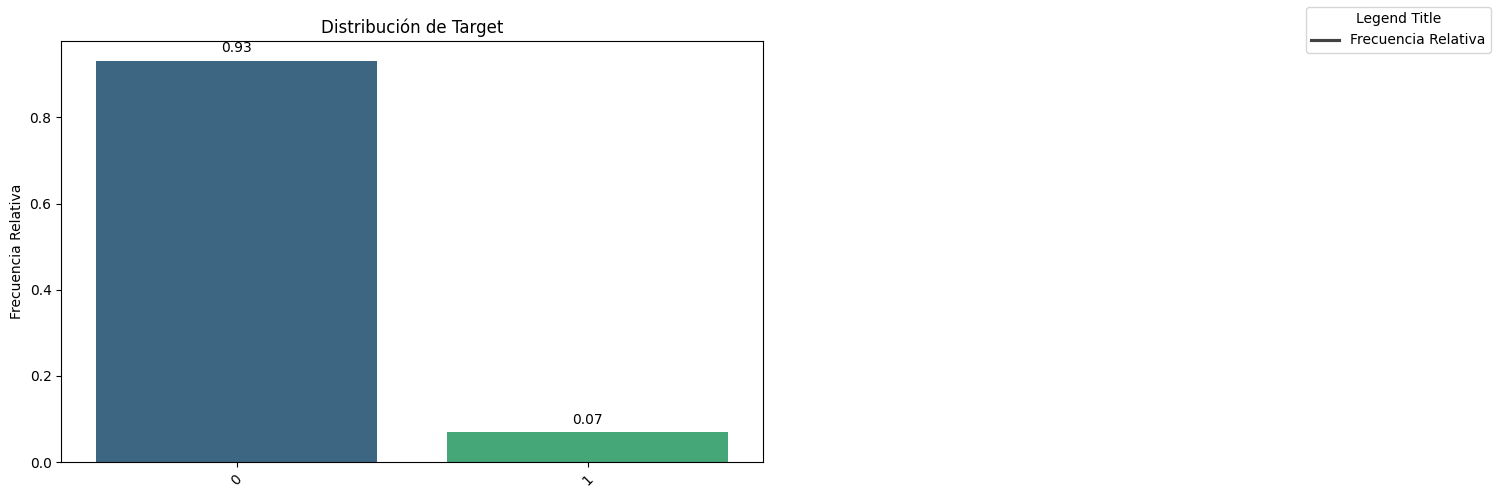

In [9]:
bt.pinta_distribucion_categoricas(df_credit, ["Target"], mostrar_valores= True, relativa= True)

Target muy desequilibrada, solo habiendo un 7% de morosos segun los datos dectectados, habra que intentar un equilibrado

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

SPLIT

In [94]:
columns_x=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [95]:
y= df_credit.Target

X=df_credit[columns_x]

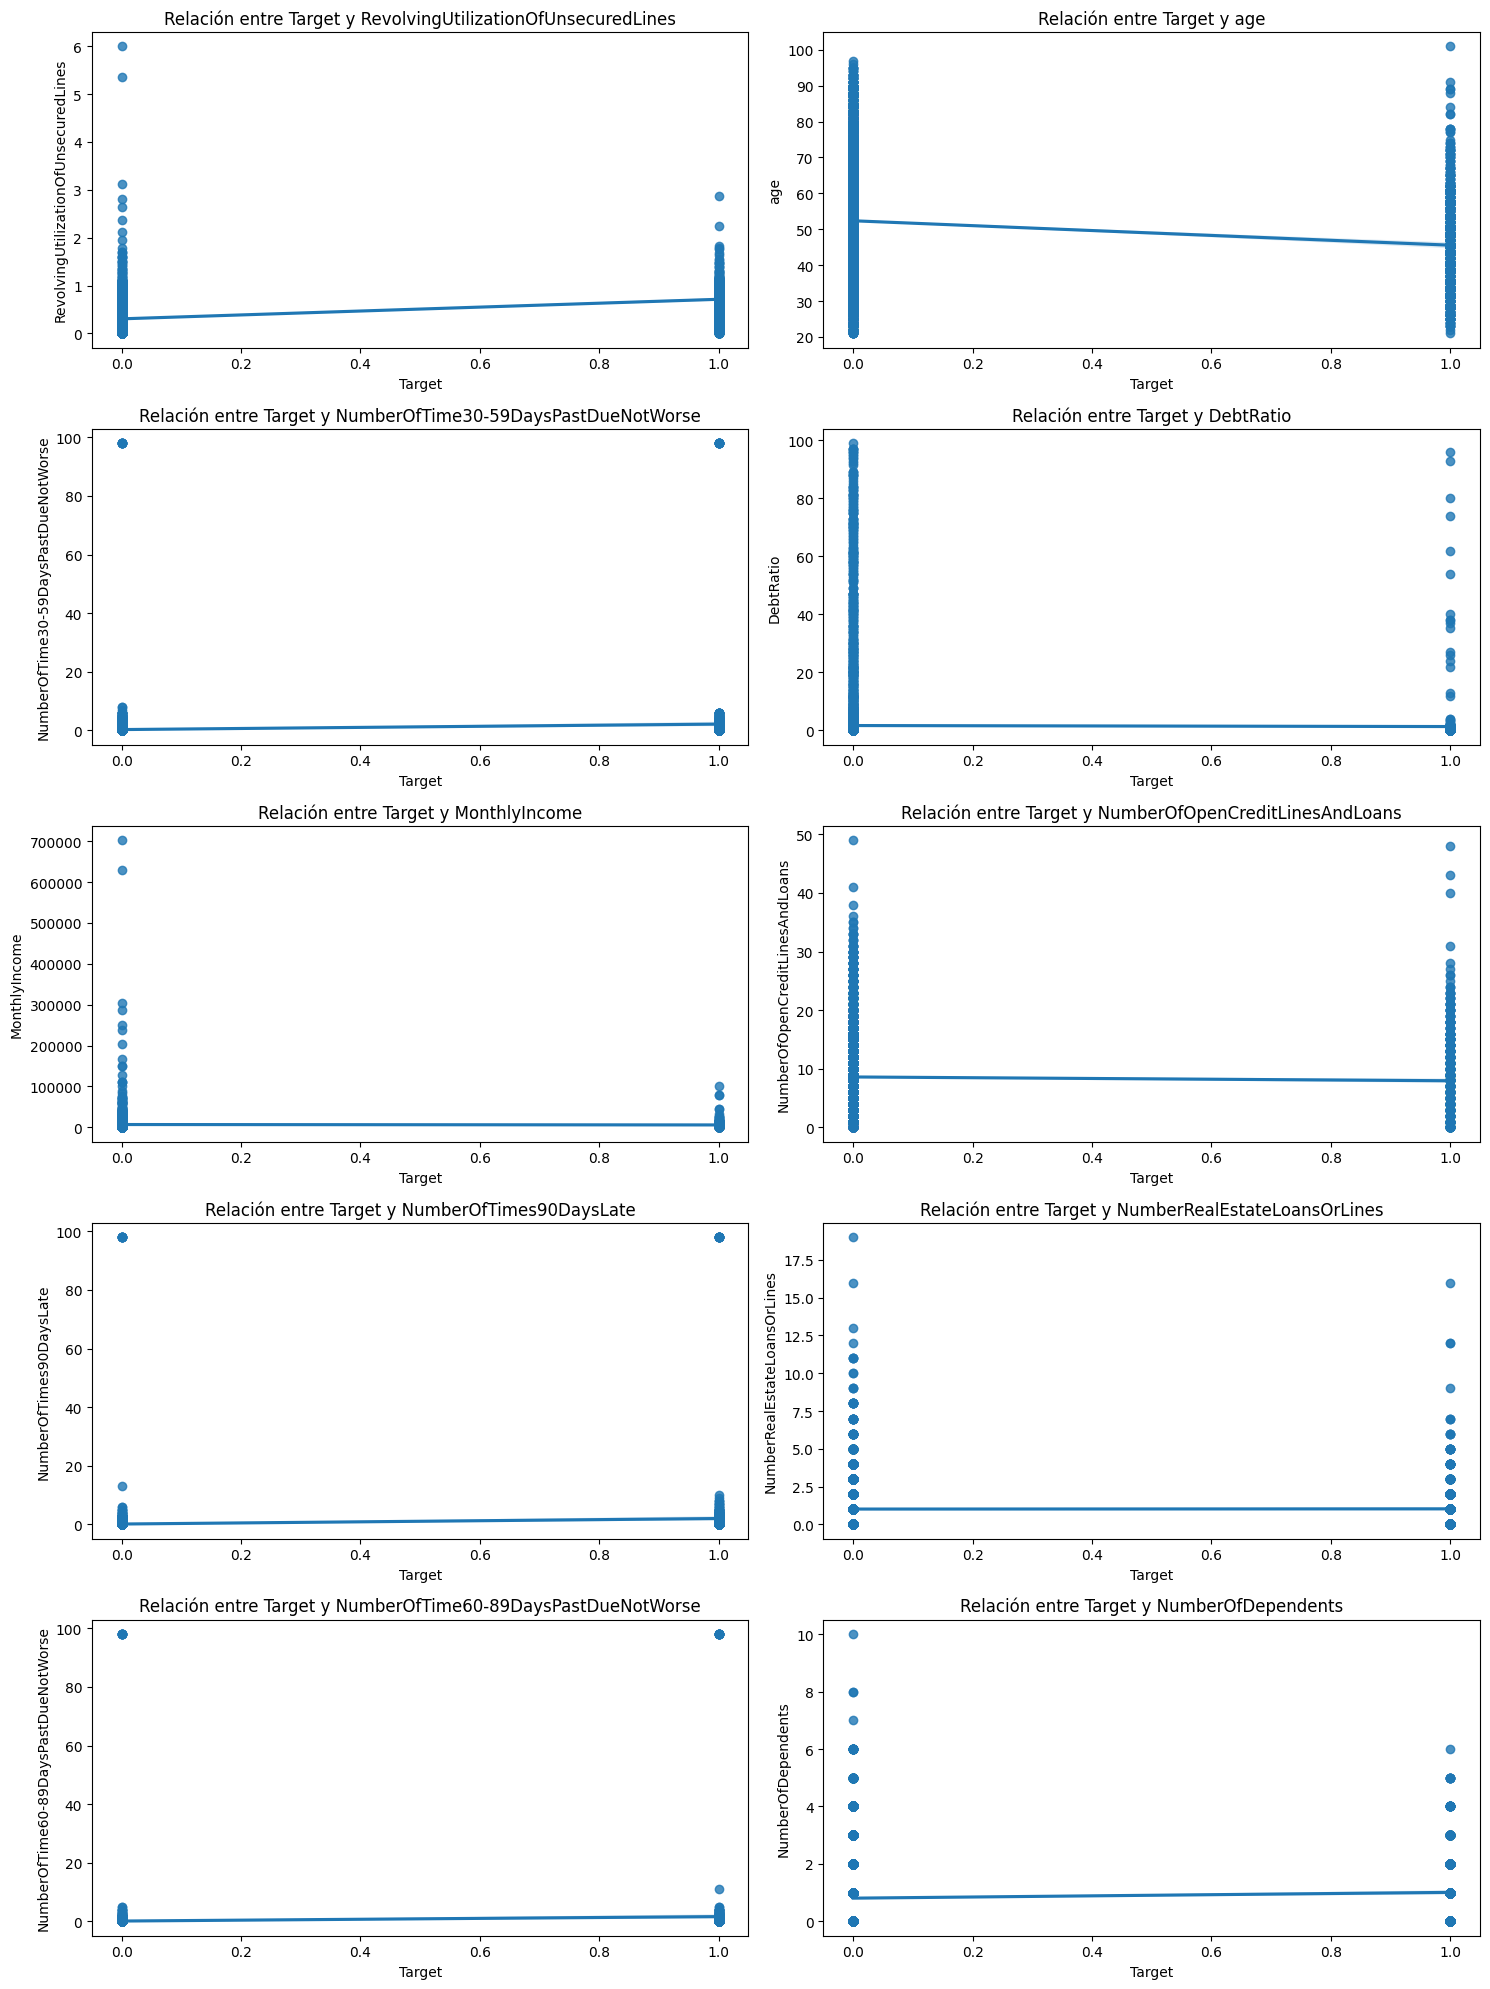

In [96]:
plt.figure(figsize=(15, 20))

# Bucle para trazar cada relación
for i, column in enumerate(columns_x, 1):
    plt.subplot(5, 2, i)  # Configuración de subgráficos
    sns.regplot(data=df_credit, x="Target", y=column)
    plt.title(f'Relación entre Target y {column}')

plt.tight_layout()
plt.show()

In [107]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print("El tamaño de X_train", len(X_train))
print("El tamaño de y_train", len(y_train))
print("El tamaño de X_test", len(X_test))
print("El tamaño de y_test", len(y_test))

El tamaño de X_train 9888
El tamaño de y_train 9888
El tamaño de X_test 2472
El tamaño de y_test 2472


In [14]:
df_credit.MonthlyIncome.fillna(6864.82, inplace=True)

C:\Users\victo\AppData\Local\Temp\ipykernel_8200\4104645232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit.MonthlyIncome.fillna(6864.82, inplace=True)


In [15]:
df_credit.MonthlyIncome.isna().sum()

0

In [16]:
df_credit=df_credit.dropna()

In [17]:
df_credit.isna().sum()

Target                                  0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [99]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12360 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Target                                12360 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12360 non-null  float64
 2   age                                   12360 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12360 non-null  int64  
 4   DebtRatio                             12360 non-null  float64
 5   MonthlyIncome                         12360 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12360 non-null  int64  
 7   NumberOfTimes90DaysLate               12360 non-null  int64  
 8   NumberRealEstateLoansOrLines          12360 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12360 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), int64

In [104]:
# escalamos todas las variables 
scaler = StandardScaler()
df_credit_escalado= df_credit.copy()
df_credit_escalado= scaler.fit_transform(df_credit_escalado)
df_credit_escalado

array([[-0.27363493, -0.68007796, -1.00009402, ..., -0.89216951,
        -0.05600397, -0.72318713],
       [-0.27363493, -0.8391014 ,  1.48469667, ..., -0.01189369,
        -0.05600397, -0.72318713],
       [-0.27363493, -0.90276943, -0.59715499, ..., -0.89216951,
        -0.05600397,  1.03620524],
       ...,
       [-0.27363493, -0.5755961 , -0.19421596, ...,  0.86838212,
        -0.05600397,  1.03620524],
       [-0.27363493, -0.21595414,  0.74597511, ..., -0.89216951,
        -0.05600397,  0.15650905],
       [-0.27363493, -0.90276943, -0.79862451, ...,  0.86838212,
        -0.05600397,  0.15650905]])

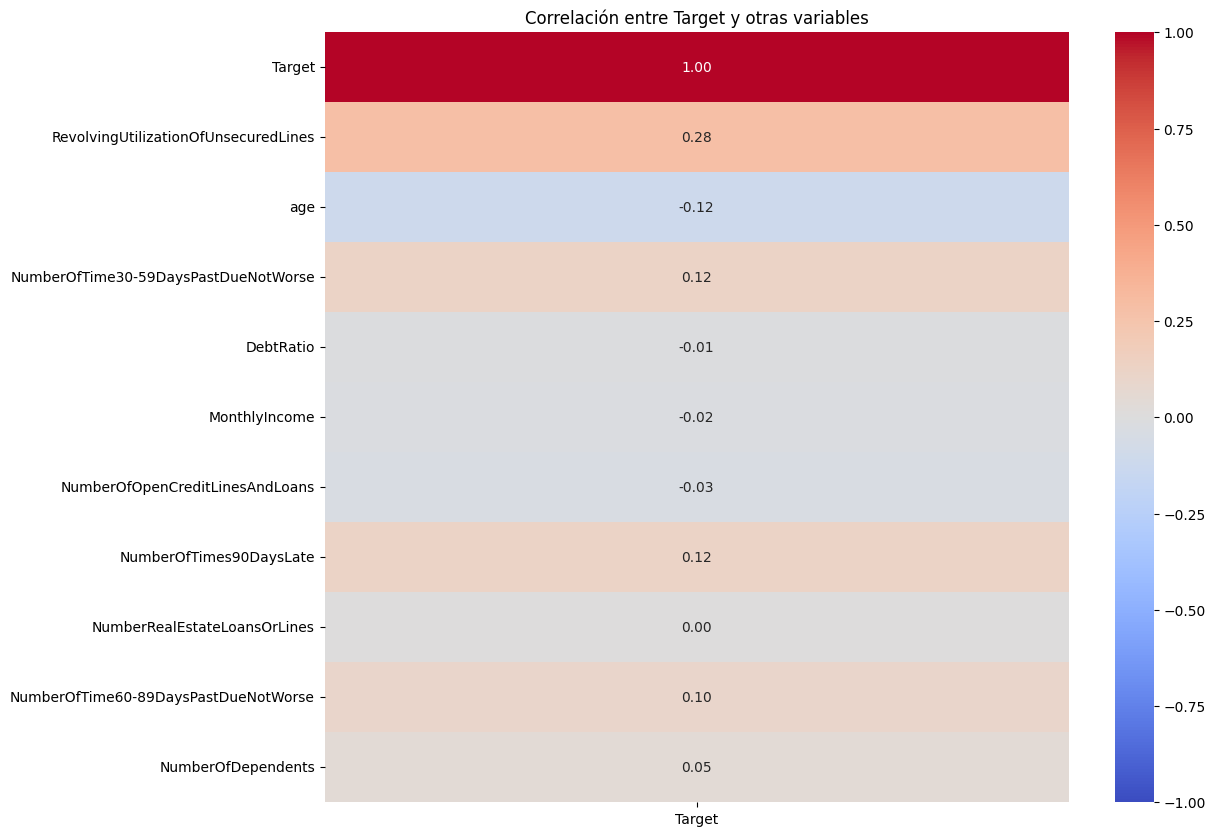

In [105]:
# correlacion entre variables 

correlation_matrix = df_credit.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 10))

# Mapa de calor de la correlación
sns.heatmap(correlation_matrix[['Target']], annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlación entre Target y otras variables')
plt.show()

In [110]:
bt.obtener_estadisticas(df_credit)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Target,0.02,int64,0.07,No,0.25,0.06,0.0,0.0,0.0,numerica discreta,0.0
RevolvingUtilizationOfUnsecuredLines,86.17,float64,0.33,No,0.37,0.14,0.03,0.17,0.58,numerica continua,0.0
age,0.63,int64,51.89,No,14.89,221.75,41.0,51.0,62.0,numerica continua,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.08,int64,0.4,No,3.89,15.14,0.0,0.0,0.0,numerica discreta,0.0
DebtRatio,93.4,float64,1.64,No,8.41,70.77,0.14,0.3,0.5,numerica continua,0.0
MonthlyIncome,33.72,float64,6864.82,No,11592.04,134375423.85,3500.0,5615.5,8100.0,numerica continua,0.0
NumberOfOpenCreditLinesAndLoans,0.35,int64,8.56,No,5.16,26.58,5.0,8.0,11.0,numerica continua,0.0
NumberOfTimes90DaysLate,0.11,int64,0.25,No,3.87,14.97,0.0,0.0,0.0,numerica continua,0.0
NumberRealEstateLoansOrLines,0.13,int64,1.01,No,1.14,1.29,0.0,1.0,2.0,numerica continua,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.06,int64,0.22,No,3.85,14.83,0.0,0.0,0.0,numerica discreta,0.0


# 1. REGRESION LOGISTICA

In [111]:
y= df_credit.Target
#X=pd.DataFrame(X)

X= df_credit.drop(['Target'], axis=1)
#y=pd.DataFrame(y)

In [112]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print("El tamaño de X_train", len(X_train))
print("El tamaño de y_train", len(y_train))
print("El tamaño de X_test", len(X_test))
print("El tamaño de y_test", len(y_test))

El tamaño de X_train 9888
El tamaño de y_train 9888
El tamaño de X_test 2472
El tamaño de y_test 2472


In [113]:
# Normalizamos las features para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
reg_log= LogisticRegression(random_state=42)

reg_log.fit(X_train_scaled, y_train)
y_pred= reg_log.predict(X_test_scaled)

# Evalúa el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.93
Confusion Matrix:
[[2276    9]
 [ 176   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2285
           1       0.55      0.06      0.11       187

    accuracy                           0.93      2472
   macro avg       0.74      0.53      0.53      2472
weighted avg       0.90      0.93      0.90      2472



hiperparamteros

In [122]:
modelo_logreg = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_logreg, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajustar el modelo a los datos
grid_search.fit(X_train_scaled, y_train)

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [124]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [125]:
reg_log_hiper= LogisticRegression(C= 10, max_iter= 100, penalty= 'l1', solver= 'liblinear', random_state=42)

reg_log_hiper.fit(X_train_scaled, y_train)
y_pred= reg_log.predict(X_test_scaled)

# Evalúa el modelo
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)
classification_rep2 = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f'Accuracy2: {accuracy:.2f}')
print(f'Confusion Matrix2:\n{conf_matrix}')
print(f'Classification Report2:\n{classification_rep}')

Accuracy2: 0.93
Confusion Matrix2:
[[2276    9]
 [ 176   11]]
Classification Report2:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2285
           1       0.55      0.06      0.11       187

    accuracy                           0.93      2472
   macro avg       0.74      0.53      0.53      2472
weighted avg       0.90      0.93      0.90      2472



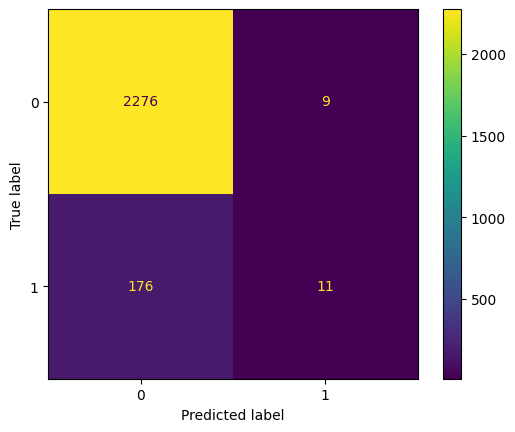

In [165]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

RESIDUOS

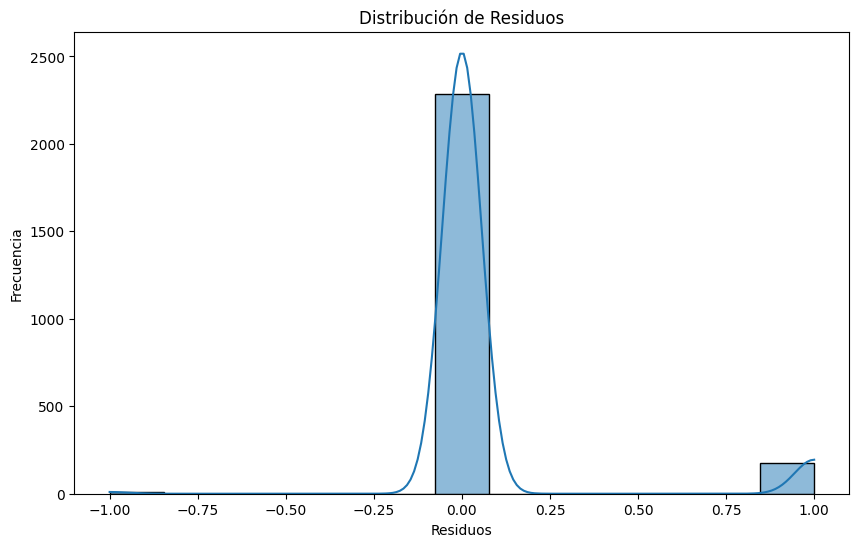

In [130]:
residuos = y_test - y_pred
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


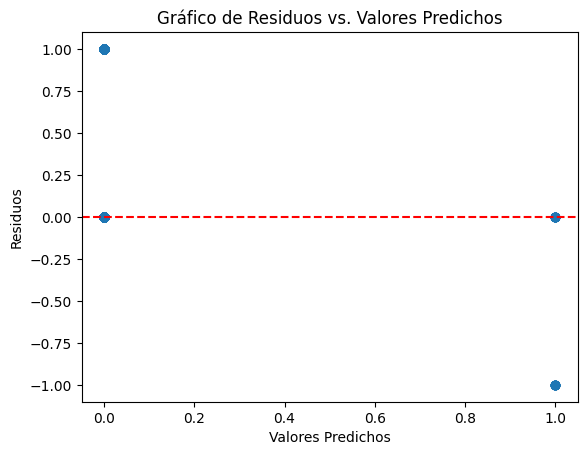

In [128]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

PROBAMOS EQUILIBRANDO LA TARGET CON SMOTE(Técnica de Sobremuestreo Sintético de Minorías)

In [188]:

smote = SMOTE(random_state=42, sampling_strategy=0.49, n_jobs=-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [162]:
y_train_smote.value_counts()/len(df_credit)*100

Target
0    74.546926
1    36.521036
Name: count, dtype: float64

<Axes: >

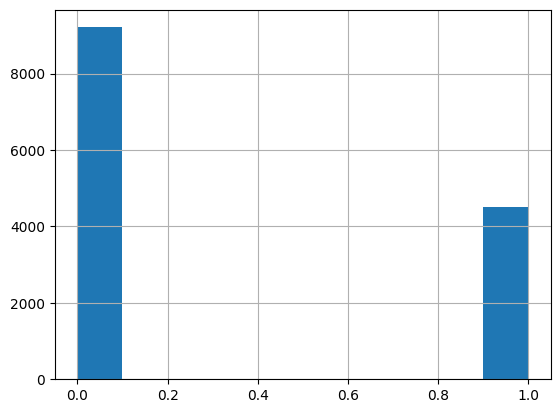

In [163]:
y_train_smote.hist()

In [221]:
reg_log_smote= LogisticRegression(random_state=42)

reg_log_smote.fit(X_train_smote, y_train_smote)
y_pred_rl_smote= reg_log.predict(X_test)

# Evalúa el modelo
accuracy = accuracy_score(y_test, y_pred_rl_smote)
conf_matrix = confusion_matrix(y_test, y_pred_rl_smote)
classification_rep = classification_report(y_test, y_pred_rl_smote)

# Imprimir los resultados
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.92
Confusion Matrix:
[[2285    0]
 [ 186    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2285
           1       1.00      0.01      0.01       187

    accuracy                           0.92      2472
   macro avg       0.96      0.50      0.49      2472
weighted avg       0.93      0.92      0.89      2472



c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


METODO CLASS_WEIGHT

In [166]:
lr_cla_w = LogisticRegression(class_weight = "balanced", max_iter = 10000)
lr_cla_w.fit(X_train, y_train)
y_pred_test = lr_cla_w.predict(X_test)

In [223]:
lr_cla_w

LogisticRegression(class_weight='balanced', max_iter=10000)

In [220]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2285
           1       0.22      0.75      0.34       187

    accuracy                           0.78      2472
   macro avg       0.60      0.77      0.60      2472
weighted avg       0.92      0.78      0.83      2472

[[1787  498]
 [  47  140]]


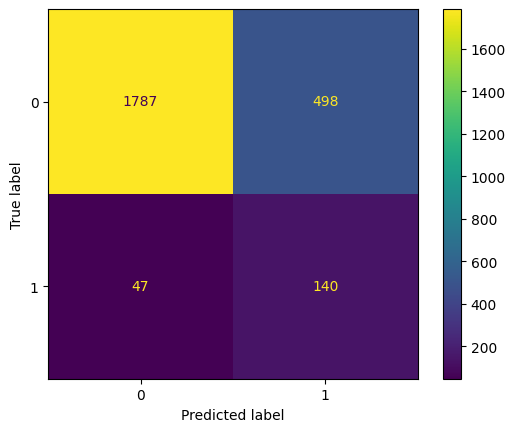

In [170]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test))

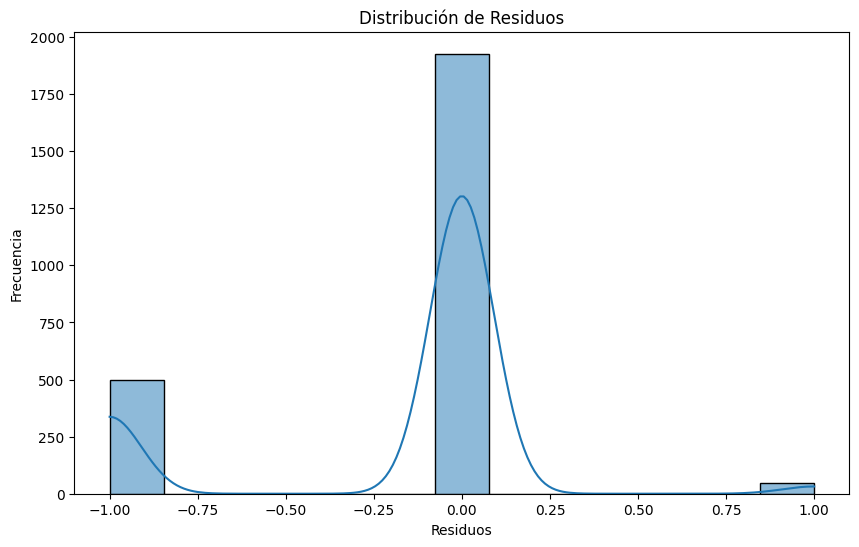

In [171]:
residuos = y_test - y_pred_test
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

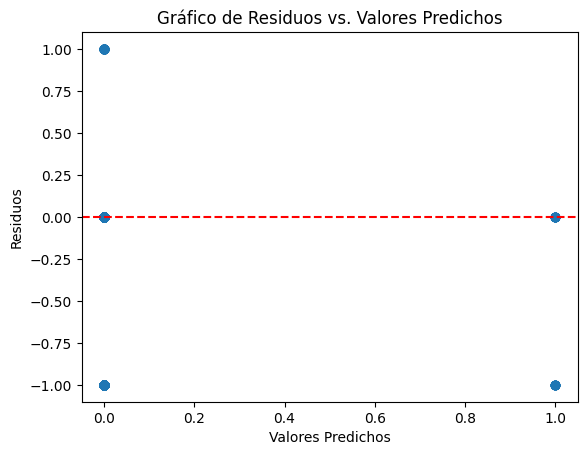

In [172]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

# 2. KN-CLASSIFIER

In [173]:
knc = KNeighborsClassifier(n_neighbors=5)

# Ajusta el modelo a los datos de entrenamiento
knc.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_knc = knc.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy3 = accuracy_score(y_test, y_pred_knc)
conf_matrix3 = confusion_matrix(y_test, y_pred_knc)
class_report3 = classification_report(y_test, y_pred_knc)

print(f'Accuracy3: {accuracy}')
print(f'Confusion Matrix3:\n{conf_matrix}')
print(f'Classification Report3:\n{class_report3}')

Accuracy3: 0.9251618122977346
Confusion Matrix3:
[[2276    9]
 [ 176   11]]
Classification Report3:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2285
           1       0.00      0.00      0.00       187

    accuracy                           0.92      2472
   macro avg       0.46      0.50      0.48      2472
weighted avg       0.85      0.92      0.89      2472



HIPERPARAMETROS

In [174]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Crea un modelo de KNeighborsClassifier
knc = KNeighborsClassifier()

# Configura GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy')

# Ajusta GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [176]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [180]:
knc_hiper= KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')

knc_hiper.fit(X_train_scaled, y_train)
y_pred_knc_hiper= reg_log.predict(X_test)

# Evalúa el modelo
accuracy5 = accuracy_score(y_test, y_pred_knc_hiper)
conf_matrix5 = confusion_matrix(y_test, y_pred_knc_hiper)
classification_rep5 = classification_report(y_test, y_pred_knc_hiper)

# Imprimir los resultados
print(f'Accuracy5: {accuracy:.2f}')
print(f'Confusion Matrix5:\n{conf_matrix}')
print(f'Classification Report5:\n{classification_rep}')

Accuracy5: 0.93
Confusion Matrix5:
[[2276    9]
 [ 176   11]]
Classification Report5:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2285
           1       0.55      0.06      0.11       187

    accuracy                           0.93      2472
   macro avg       0.74      0.53      0.53      2472
weighted avg       0.90      0.93      0.90      2472



c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


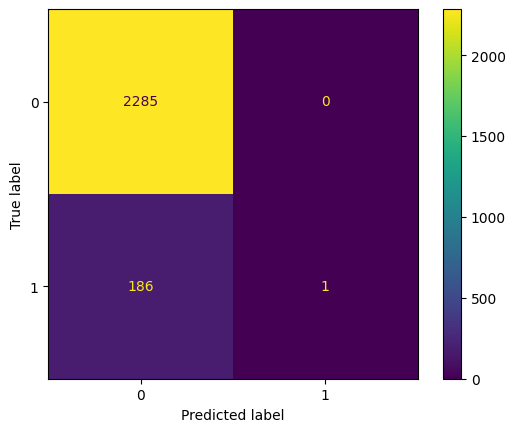

In [181]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knc_hiper))

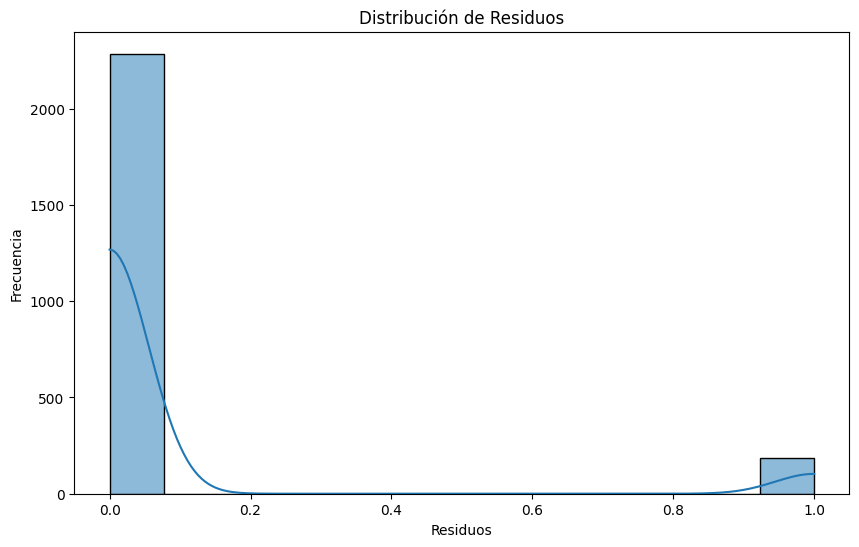

In [182]:
residuos = y_test - y_pred_knc_hiper
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

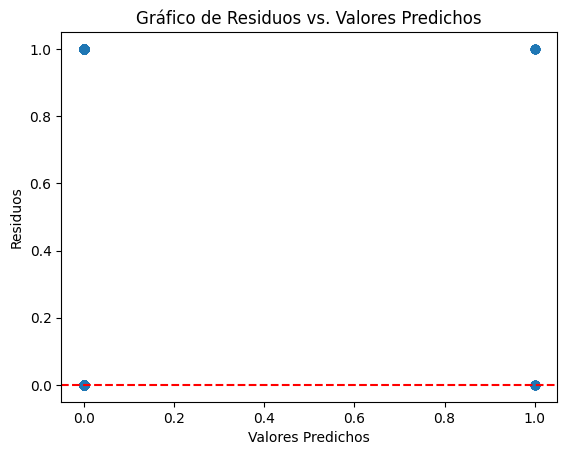

In [183]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

EFECTUAMOS EQUILIBRADO DE LA TARGET

In [193]:
smote = SMOTE(sampling_strategy=0.49, random_state=42)

X_train_resampled_knc, y_train_resampled_knc = smote.fit_resample(X_train, y_train)

<Axes: >

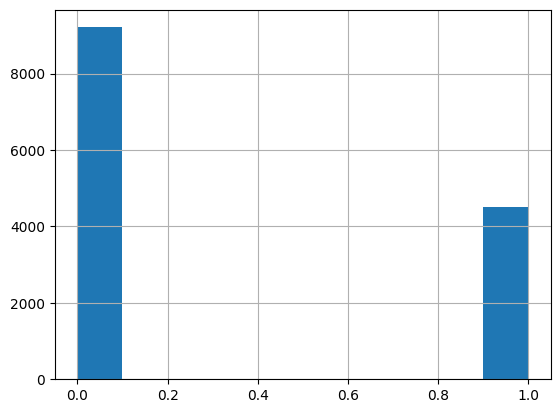

In [194]:
y_train_resampled_knc.hist()

In [195]:
y_train_resampled_knc.value_counts()/len(df_credit)*100

Target
0    74.546926
1    36.521036
Name: count, dtype: float64

In [197]:
knc_hiper= KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')

knc_hiper.fit(X_train_resampled_knc, y_train_resampled_knc)
y_pred_knc_hiper_smote= reg_log.predict(X_test)

# Evalúa el modelo
Accuracy6 = accuracy_score(y_test, y_pred_knc_hiper_smote)
conf_matrix6 = confusion_matrix(y_test, y_pred_knc_hiper_smote)
classification_rep6 = classification_report(y_test, y_pred_knc_hiper_smote)

# Imprimir los resultados
print(f'Accuracy6: {accuracy:.2f}')
print(f'Confusion Matrix6:\n{conf_matrix}')
print(f'Classification Report6:\n{classification_rep}')

Accuracy6: 0.93
Confusion Matrix6:
[[2276    9]
 [ 176   11]]
Classification Report6:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2285
           1       0.55      0.06      0.11       187

    accuracy                           0.93      2472
   macro avg       0.74      0.53      0.53      2472
weighted avg       0.90      0.93      0.90      2472



c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


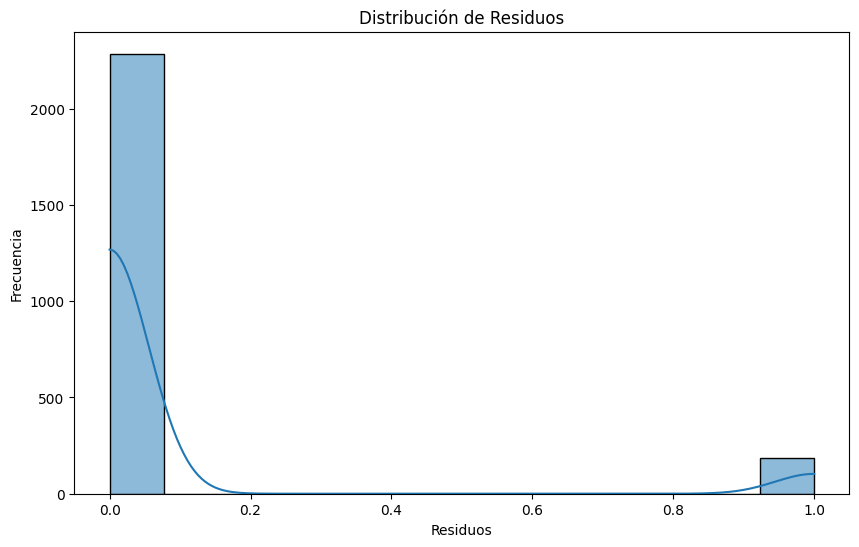

In [199]:
residuos = y_test - y_pred_knc_hiper_smote
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 3. DECISIONTREECLASSIFIER

In [200]:

dtc = DecisionTreeClassifier(random_state=42)

# Entrena el modelo con los datos de entrenamiento
dtc.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_tree = dtc.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy}')

# informe de clasificación y la matriz de confusión
print('\nClassification Report:')
print(classification_report(y_test, y_pred_tree))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree))


Accuracy: 0.8907766990291263

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2285
           1       0.27      0.26      0.26       187

    accuracy                           0.89      2472
   macro avg       0.60      0.60      0.60      2472
weighted avg       0.89      0.89      0.89      2472


Confusion Matrix:
[[2154  131]
 [ 139   48]]


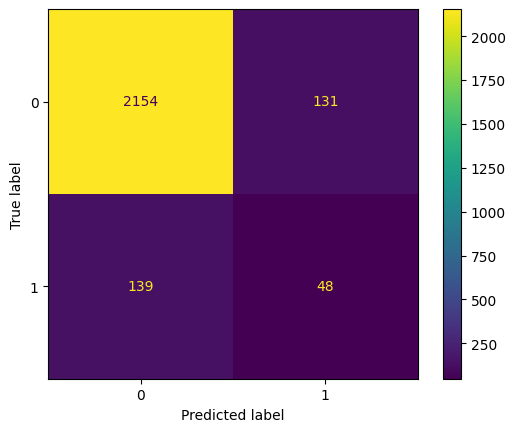

In [206]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree))

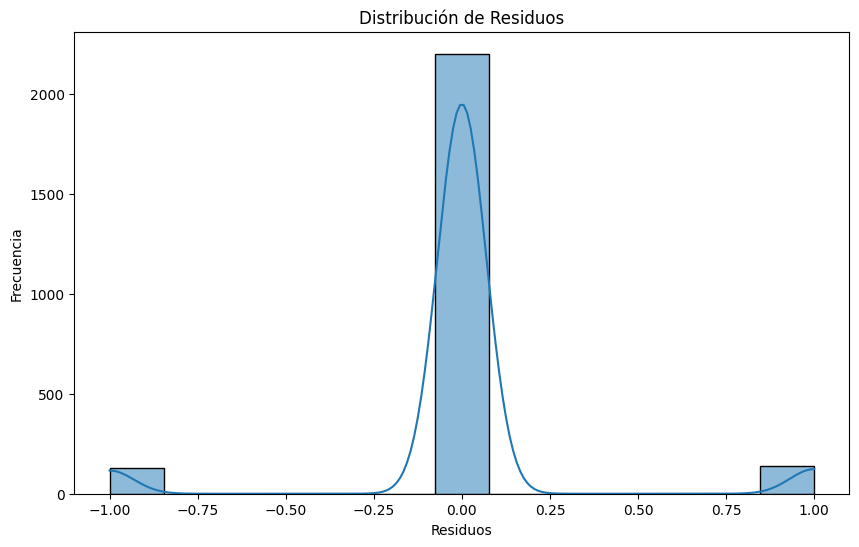

In [207]:
residuos = y_test - y_pred_tree
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

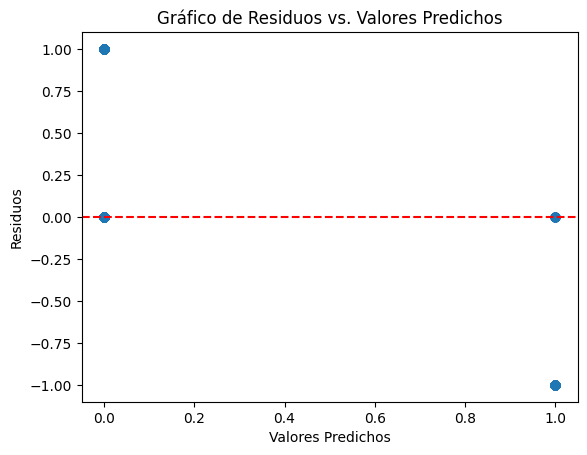

In [208]:
plt.scatter(y_pred_tree, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

hiperparametros

In [201]:
clf = DecisionTreeClassifier(random_state=42)

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crea una instancia de GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [204]:
grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [205]:
dtc_hiper = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='sqrt',min_samples_leaf=4,min_samples_split=2,splitter='random',  random_state=42)

# Entrena el modelo con los datos de entrenamiento
dtc_hiper.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_tree_hiper = dtc_hiper.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_tree_hiper)
print(f'Accuracy: {accuracy}')

# informe de clasificación y la matriz de confusión
print('\nClassification Report:')
print(classification_report(y_test, y_pred_tree_hiper))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree_hiper))

Accuracy: 0.9247572815533981

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2285
           1       0.51      0.10      0.17       187

    accuracy                           0.92      2472
   macro avg       0.72      0.55      0.57      2472
weighted avg       0.90      0.92      0.90      2472


Confusion Matrix:
[[2267   18]
 [ 168   19]]


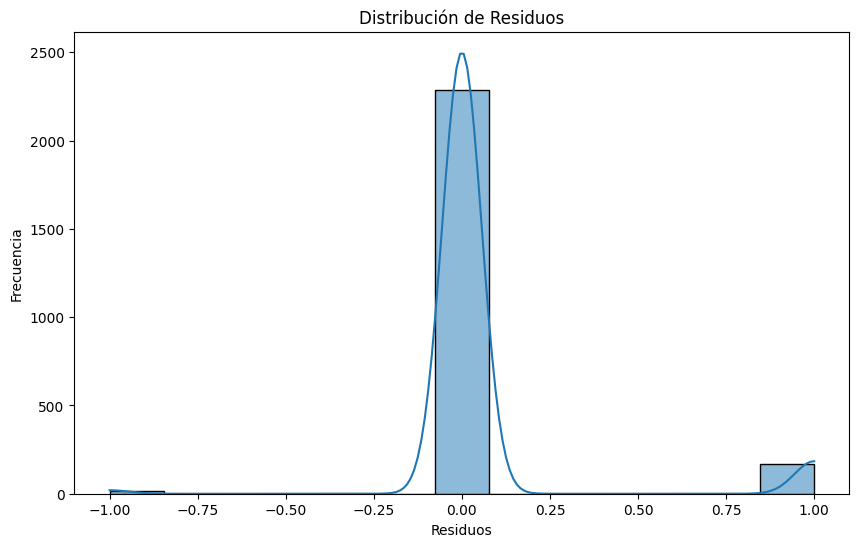

In [209]:
residuos = y_test - y_pred_tree_hiper
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

CON EQUILIBRADO DE LA TARGET

In [210]:
smote = SMOTE(sampling_strategy=0.49, random_state=42)

X_train_resampled_dtc, y_train_resampled_dtc = smote.fit_resample(X_train, y_train)

<Axes: >

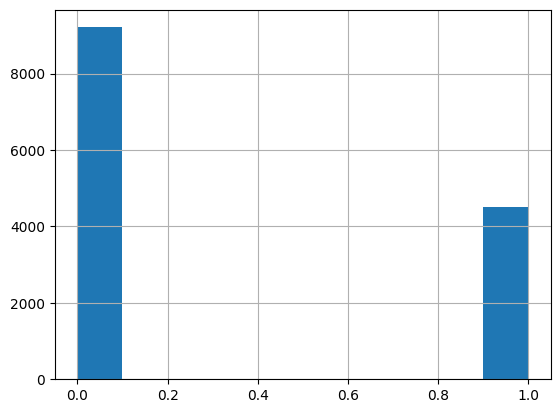

In [211]:
y_train_resampled_dtc.hist()

In [212]:

dtc = DecisionTreeClassifier(random_state=42)

# Entrena el modelo con los datos de entrenamiento
dtc.fit(X_train_resampled_dtc, y_train_resampled_dtc)

# Realiza predicciones en el conjunto de prueba
y_pred_tree_smote = dtc.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_tree_smote)
print(f'Accuracy: {accuracy}')

# informe de clasificación y la matriz de confusión
print('\nClassification Report:')
print(classification_report(y_test, y_pred_tree_smote))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_tree_smote))

Accuracy: 0.8588187702265372

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2285
           1       0.23      0.36      0.28       187

    accuracy                           0.86      2472
   macro avg       0.59      0.63      0.60      2472
weighted avg       0.89      0.86      0.87      2472


Confusion Matrix:
[[2055  230]
 [ 119   68]]


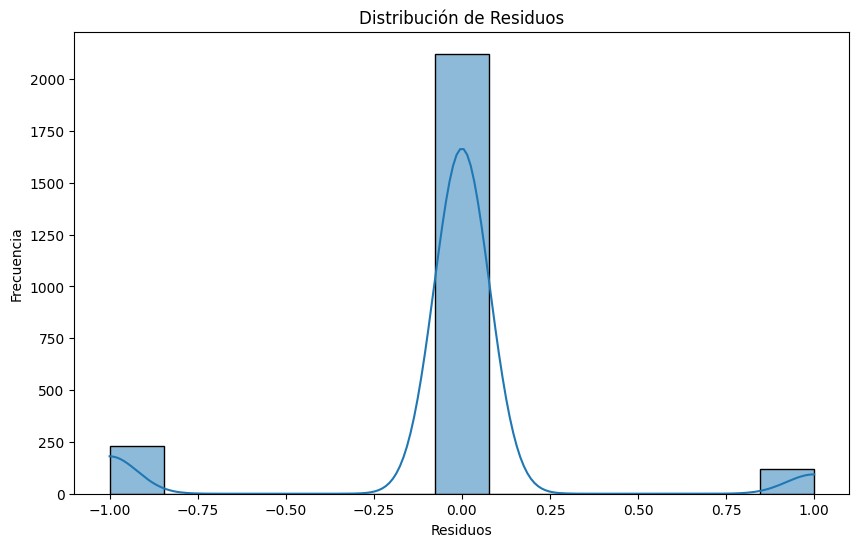

In [213]:
residuos = y_test - y_pred_tree_smote
# Visualiza la distribución de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

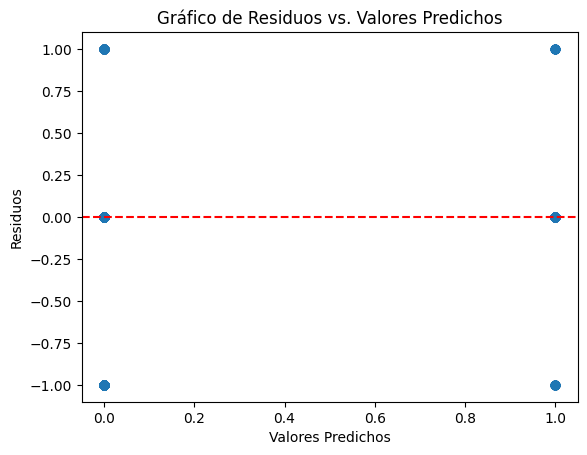

In [214]:
plt.scatter(y_pred_tree, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

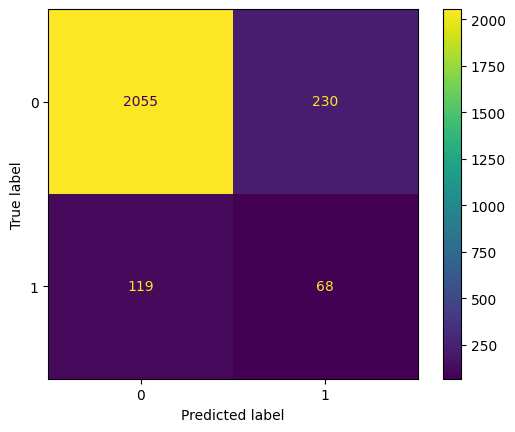

In [215]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree_smote))

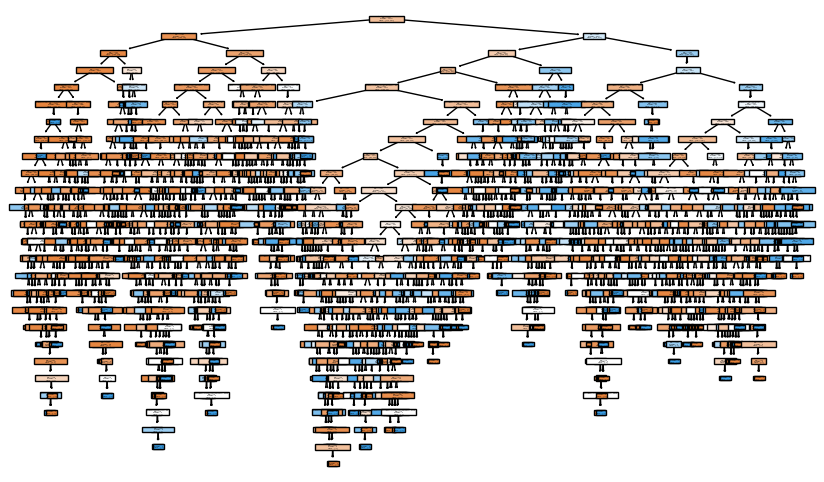

In [217]:

plt.figure(figsize=(10, 6))
tree.plot_tree(dtc, filled=True, feature_names=df_credit.columns[1:])
plt.show()

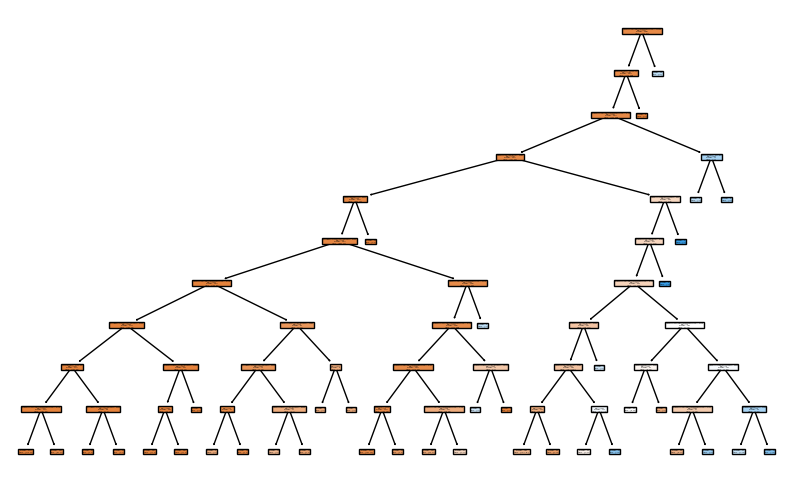

In [218]:

plt.figure(figsize=(10, 6))
tree.plot_tree(dtc_hiper, filled=True, feature_names=df_credit.columns[1:])
plt.show()

## CONCLUSION: 

En relacion a los tres modelos usados con el dafaframe de esta practica y una vez balanceados, el que mejor rendimiento ha dado es el modelo de regresion logistica mejorado y equilibrado con SMOTE:

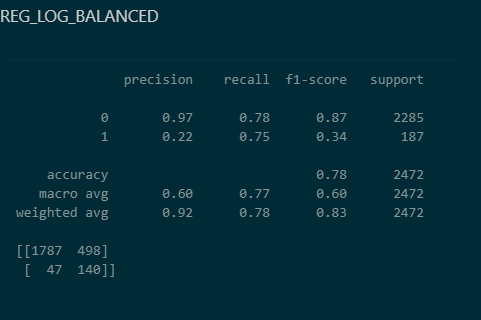

Como se puede observar presentan una precision muy alta en reconocer a las personas que estan al dia de sus deudas, y un recall casi en un 80% para reconocer tanto a morosos como a pagadores. La unica pega es la precision en reconocer a los morosos, que se podria mejorar ampliando datos si ha negocio le intersa.

C:\Users\victo\AppData\Local\Temp\ipykernel_8200\1272506332.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}%'.format(y) for y in np.arange(0, 101, 20)])


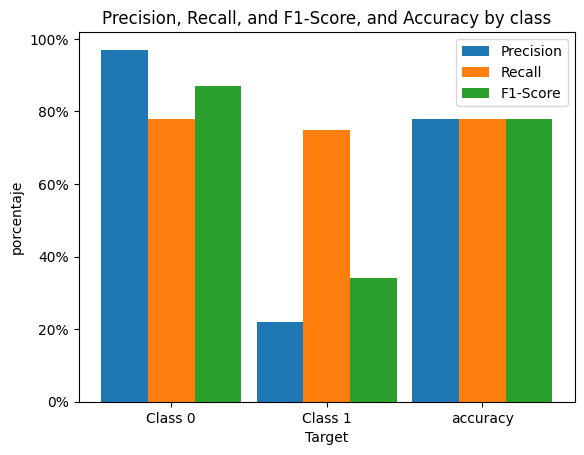

In [231]:
# Definir las métricas y las clases
precision = [0.97, 0.22]
recall = [0.78, 0.75]
f1_score = [0.87, 0.34]
accuracy=0.78
classes = ["Class 0", "Class 1", "accuracy"]

# Convertir valores a porcentaje
precision_percent = np.array(precision) * 100
recall_percent = np.array(recall) * 100
f1_score_percent = np.array(f1_score) * 100
accuracy_percent = accuracy * 100

# Crear un gráfico de barras
bar_width = 0.3
index = range(len(classes))
fig, ax = plt.subplots()
bar1 = ax.bar(index, precision + [accuracy], bar_width, label='Precision')
bar2 = ax.bar([i + bar_width for i in index], recall + [accuracy], bar_width, label='Recall')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score + [accuracy], bar_width, label='F1-Score')

# Añadir etiquetas y leyenda
ax.set_xlabel('Target')
ax.set_ylabel('porcentaje')
ax.set_title("Precision, Recall, and F1-Score, and Accuracy by class")
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(classes)
ax.legend()
ax.set_yticklabels(['{:,.0f}%'.format(y) for y in np.arange(0, 101, 20)])
plt.show()


# FIN DE LA PRACTICA OBLIGATORIA

# EXPERIMENTOS Y PRUEBAS PARTICULARES FUERA DE LA PRACTICA

In [29]:
bt.obtener_estadisticas(df_credit_scaler)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
0,0.02,float64,-0.0,No,1.0,1.0,-0.27,-0.27,-0.27,numerica discreta,0.0
1,86.17,float64,0.0,No,1.0,1.0,-0.82,-0.45,0.69,numerica continua,0.0
2,0.63,float64,0.0,No,1.0,1.0,-0.73,-0.06,0.68,numerica continua,0.0
3,0.08,float64,0.0,No,1.0,1.0,-0.1,-0.1,-0.1,numerica discreta,0.0
4,93.4,float64,-0.0,No,1.0,1.0,-0.18,-0.16,-0.14,numerica continua,0.0
5,33.72,float64,0.0,No,1.0,1.0,-0.29,-0.11,0.11,numerica continua,0.0
6,0.35,float64,0.0,No,1.0,1.0,-0.69,-0.11,0.47,numerica continua,0.0
7,0.11,float64,0.0,No,1.0,1.0,-0.06,-0.06,-0.06,numerica continua,0.0
8,0.13,float64,0.0,No,1.0,1.0,-0.89,-0.01,0.87,numerica continua,0.0
9,0.06,float64,0.0,No,1.0,1.0,-0.06,-0.06,-0.06,numerica discreta,0.0


In [30]:
# transformamos de series  en un DF de una columna y los transponemos para  que quede una fila y lo demas en columnas
X_train_scal= pd.DataFrame(X_train_scal)
X_test_scal= pd.DataFrame(X_test_scal)


LINEAR REGRESION SIN CAMBIAR PESOS

In [31]:
# LINEAR REGRESION scaler
lin_reg_scal = LinearRegression()
lin_reg_scal.fit(X_train_scal, y_train_scal)
y_pred_scal= lin_reg_scal.predict(X_test_scal)

In [32]:
mse = mean_squared_error(y_test_scal, y_pred_scal)
rmse= np.sqrt(mse)
mape= mean_absolute_percentage_error(y_test_scal, y_pred_scal)
mae= mean_absolute_error(y_test_scal, y_pred_scal)
r2=r2_score(y_test_scal, y_pred_scal)
print(f'MSE: {mse}')
print(f'MAE:{mae}')
print(f'MAPE:{mape}')
print(f'RMSE:{rmse}')
print(f'R2:{r2}')



MSE: 1.5010943498040268
MAE:0.5023564397497233
MAPE:61.04394830776014
RMSE:1.2251915563715035
R2:0.013092578855682735


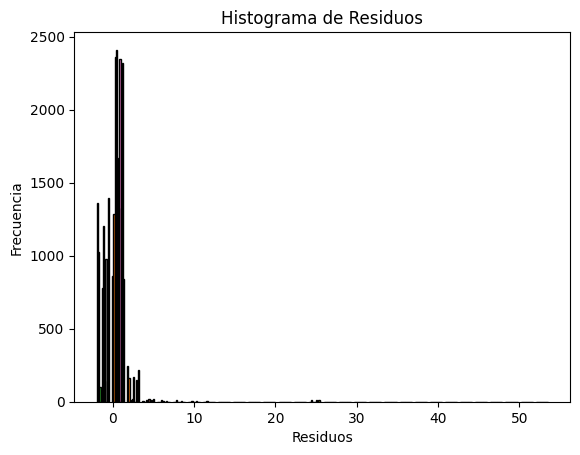

In [33]:
residuos = y_test_scal - y_pred_scal

plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

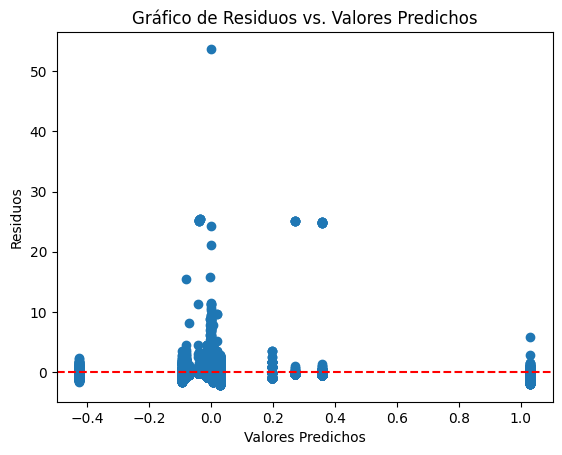

In [34]:
plt.scatter(y_pred_scal, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

In [35]:
X_w=df_credit_scaler.iloc[:,0]

In [36]:
y_w=df_credit_scaler.iloc[:,1:]

LINEAR REGRESION CAMBIANDO PESOS

In [37]:
#CAMBIAR LOS PESOS EM FUNCION DEL DESEQUILIBRIO DE LA TARGET Y COMPAPARAR CON EL ANTERIOR

# Divide los datos en entrenamiento y prueba
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(y_w, X_w,test_size=0.2, random_state=42)

# Calculo loss pesos de las muestras basados en el desequilibrio de la variable target
sample_weights_train = 1 / (y_train_w.value_counts(normalize=True) * len(y_train_w))

# Mapea los pesos a las muestras en el conjunto de entrenamiento
sample_weights_train = y_train_w.map(sample_weights_train)

# los pesos a un array
sample_weights_train = np.array(sample_weights_train)

# Crea y ajusta el modelo de regresión lineal con ponderación de muestras
lin_reg_w = LinearRegression()
lin_reg_w.fit(X_train_w, y_train_w, sample_weight=sample_weights_train)

# Realiza predicciones en el conjunto de prueba
y_pred_w = lin_reg_w.predict(X_test_w)

# Evalúa el modelo
mse = mean_squared_error(y_test_w, y_pred_w)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test_w, y_pred_w)
mae=mean_squared_error(y_test_w, y_pred_w)
r2=r2_score(y_test_w, y_pred_w)
print(f'MSE: {mse}')
print(f'MAE:{mae}')
print(f'MAPE:{mape}')
print(f'RMSE:{rmse}')
print(f'R2:{r2}')



MSE: 2.8069950735599765
MAE:2.8069950735599765
MAPE:4.864367597406412
RMSE:1.6754089272652144
R2:-1.6015792272875453


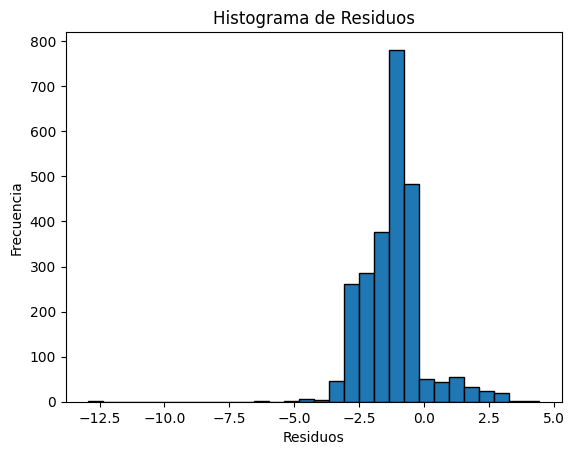

In [38]:
residuos = y_test_w - y_pred_w

plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()


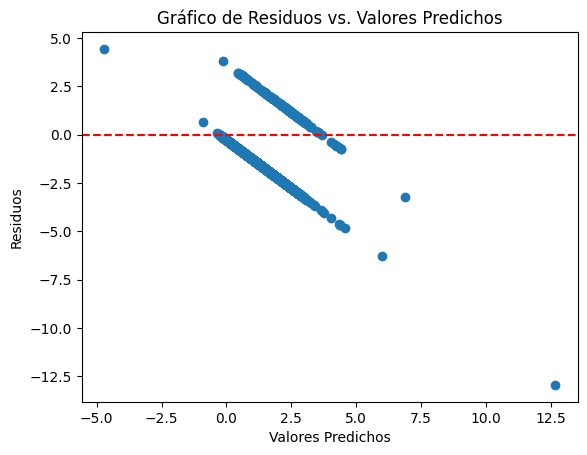

In [39]:

plt.scatter(y_pred_w, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()


KN-REGRESION

In [46]:
# Divide los datos en entrenamiento y prueba
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_w, y_w,test_size=0.2, random_state=42)
y_w=pd.DataFrame(y_w)
X_w=pd.DataFrame(X_w)

#
knr = KNeighborsRegressor(n_neighbors=5, weights= "distance")

# entrenamos y predecimos con el  conjunto de prueba
knr.fit(X_train_k, y_train_k)
y_pred_k = knr.predict(X_test_k)

# Evalúa el modelo
mse = mean_squared_error(y_test_k, y_pred_k)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test_k, y_pred_k)
mae=mean_squared_error(y_test_k, y_pred_k)
r2=r2_score(y_test_k, y_pred_k)
print(f'MSE: {mse}')
print(f'MAE:{mae}')
print(f'MAPE:{mape}')
print(f'RMSE:{rmse}')
print(f'R2:{r2}')


MSE: 1.6083046948186923
MAE:1.6083046948186923
MAPE:1748.3858078461665
RMSE:1.2681895342647693
R2:-0.08281645303479586


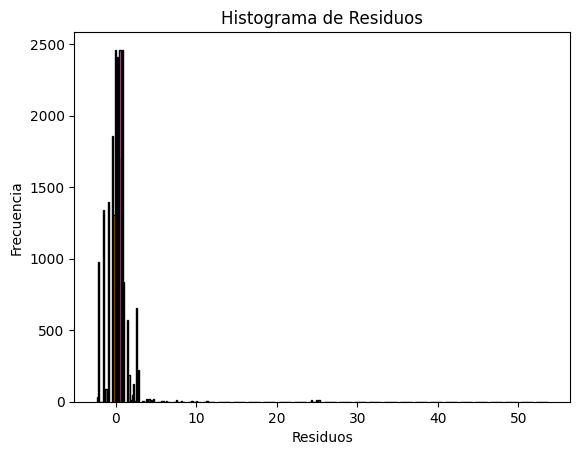

In [47]:
residuos = y_test_k- y_pred_k

plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

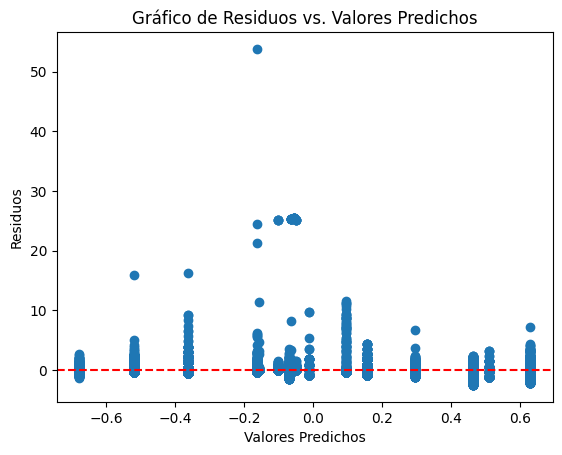

In [49]:
plt.scatter(y_pred_k, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()


RANDOMFORESTREGRESOR

In [64]:
# DividO los datos en entrenamiento y prueba
X_train_for, X_test_for, y_train_for, y_test_for = train_test_split(X_w, y_w,test_size=0.2, random_state=42)
y_w=pd.DataFrame(y_w)
X_w=pd.DataFrame(X_w)

# Crear el modelo
ran_for = RandomForestRegressor(n_estimators=500, max_depth=10, max_features='log2',random_state=42)

# Ajustar el modelo
ran_for.fit(X_train_for, y_train_for)

# Predecir en el conjunto de prueba
y_pred_for = ran_for.predict(X_test_for)

# Evalúa el modelo
mse = mean_squared_error(y_test_for, y_pred_for)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test_for, y_pred_for)
mae=mean_squared_error(y_test_for, y_pred_for)
r2=r2_score(y_test_for, y_pred_for)
print(f'MSE: {mse}')
print(f'MAE:{mae}')
print(f'MAPE:{mape}')
print(f'RMSE:{rmse}')
print(f'R2:{r2}')


MSE: 1.501047738100758
MAE:1.501047738100758
MAPE:60.32302474239312
RMSE:1.2251725340133766
R2:0.013107888129515044


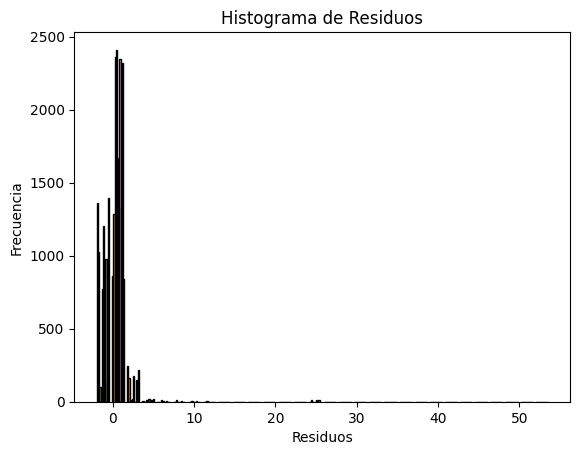

In [65]:
residuos = y_test_for- y_pred_for

plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

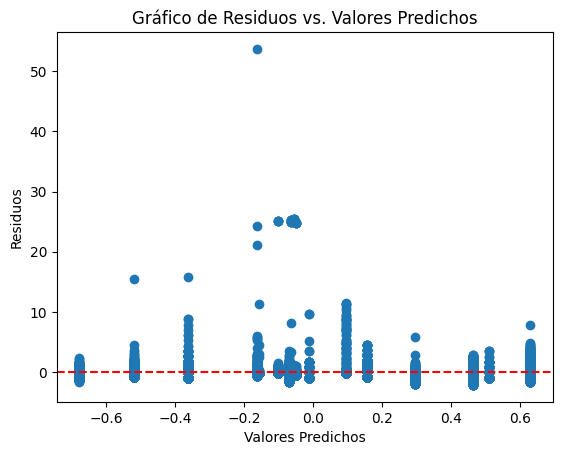

In [66]:
plt.scatter(y_pred_k, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()


# FIN DE LA PRUEBA FUERA DE LA PRACTICA OBLIGATORIA